#### Расстояние Хи-квадрат 

Распределение частот цветов гороха в эксперименте:
* f_obs = [18, 55, 27]
* f_exp = [25, 50, 25]

In [1]:
from scipy.stats import chisquare

In [2]:
# Расчет расстояния Хи-квадрат для наблюдаемых значений - 18, 55, 27; ожидаемых значений - 25, 50, 25.

chisquare(f_obs=[18, 55, 27], f_exp=[25, 50, 25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

#### Распределение расстояния Хи-квадрат

In [11]:
# Распределение расстояния Хи-квадрат при многократном (100 раз) подбрасывании монетки. H0: p(решки) = 0.5 
import random
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Частота')

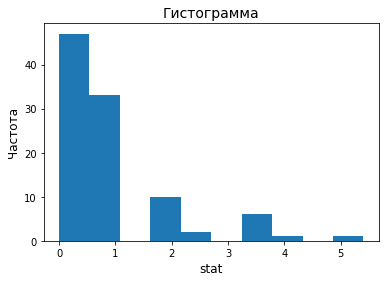

In [15]:
# Сто экспериментов с 60-ю подбрасываниями каждый
y = []
for i in range(100):
    x = []
    for i in range(60):
        x.append(random.randint(0, 1))
    y.append((x.count(0) - 30)**2 / 30 + (x.count(1) - 30)**2 / 30)

plt.hist(y)
plt.title('Гистограмма', fontsize=14)
plt.xlabel('stat', fontsize=12)
plt.ylabel('Частота', fontsize=12)

In [5]:
# Сто экспериментов с шестьюдесятью подбрасываниями каждый
# import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.stats import chisquare

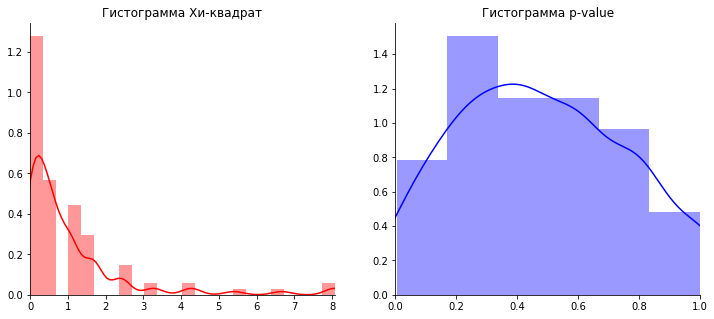

In [24]:
number_of_experiments = 100
number_of_throws = 60
expect = [number_of_throws/2]*2
chi_result = []
p_result = []

for exp in range(number_of_experiments):

    coin_throw = np.random.randint(0, 2, number_of_throws)
    result = (np.count_nonzero(coin_throw == 0)
              , np.count_nonzero(coin_throw == 1))
    chi, p_value = chisquare(result, f_exp=expect)
    chi_result.append(chi)
    p_result.append(p_value)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(chi_result, ax=ax[0], color='red') # Распределение расстояния Хи-квадрат
ax[0].set_xlim(0, max(chi_result))
ax[0].set_title('Гистограмма Хи-квадрат', fontsize=12)
sns.distplot(p_result, ax=ax[1], color='blue', bins=6) # Распределение p-value
ax[1].set_xlim(0, 1)
ax[1].set_title('Гистограмма p-value', fontsize=12)
sns.despine()

#### Распределение Хи-квадрат в зависимости от степеней свободы

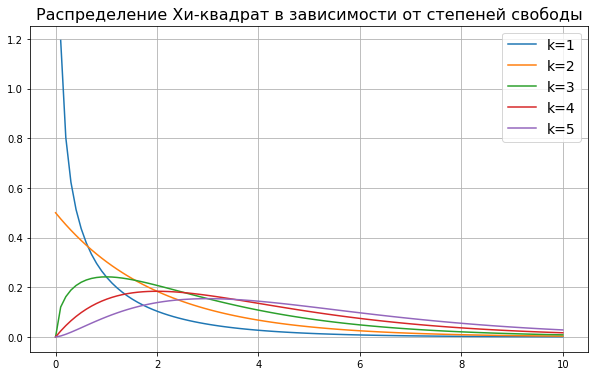

In [20]:
# Распределение Хи-квадрат в зависимости от степеней свободы
from scipy.stats import chi2
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5 # число степеней свободы

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Распределение Хи-квадрат в зависимости от степеней свободы', fontsize=16)
plt.grid()
plt.show()